<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/RNN/blob/main/ConvLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D,BatchNormalization,Conv2D,Conv3D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [43]:
def generate_moving_mnist(num_samples=1000,seq_len=10,img_size=64):
    mnist = tf.keras.datasets.mnist
    (X_train,_),(_,_) = mnist.load_data()
    X_train = X_train/255.0

    dataset = []
    for _ in range(num_samples):
        digit = X_train[np.random.randint(0,len(X_train))]
        trajectory = np.random.randint(0,img_size - 28,size=(seq_len,2))

        sequence = []
        for t in range(seq_len):
            frame = np.zeros((img_size,img_size))
            x,y = trajectory[t]
            frame[x:x+28,y:y+28] = digit
            sequence.append(frame)
        dataset.append(np.array(sequence))

    return np.array(dataset)


num_samples = 1000
seq_len = 10
img_size = 64

dataset = generate_moving_mnist(num_samples,seq_len,img_size)

train_data = dataset[:800]
test_data = dataset[800:]


In [44]:
train_data = np.expand_dims(train_data,axis=-1)

In [45]:
test_data = np.expand_dims(test_data,axis=-1)
input_shape = (seq_len-1,img_size,img_size,1)

In [66]:
model = Sequential([
    ConvLSTM2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding='same',return_sequences=True),
    BatchNormalization(),

    ConvLSTM2D(filters=32,kernel_size=(3,3),padding='same',return_sequences=True),
    BatchNormalization(),

    ConvLSTM2D(filters=64,kernel_size=(3,3),padding='same',return_sequences=False),
    BatchNormalization(),

    Conv2D(filters=1,kernel_size=(3,3),activation='sigmoid',padding='same',)
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d_39 (ConvLSTM2D)          │ (None, 9, 64, 64, 64)       │         150,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 9, 64, 64, 64)       │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_40 (ConvLSTM2D)          │ (None, 9, 64, 64, 32)       │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 9, 64, 64, 32)       │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_41 (ConvLSTM2D)          │ (None, 64, 64, 64)          │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483,393 (1.84 MB)

 Trainable params: 483,073 (1.84 MB)

 Non-trainable params: 320 (1.25 KB)

In [67]:
model.compile(optimizer='adam', loss='mse')

In [68]:
X_train = train_data[:,:-1]
y_train = train_data[:,-1]

In [69]:
X_train.shape

(800, 9, 64, 64, 1)

In [70]:
history = model.fit(X_train,y_train,batch_size=8,epochs=10,validation_split=0.1)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 339ms/step - loss: 0.1135 - val_loss: 0.3801
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 307ms/step - loss: 0.0214 - val_loss: 0.0973
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - loss: 0.0207 - val_loss: 0.0308
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 0.0207 - val_loss: 0.0209
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 308ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 0.0206 - val_loss: 0.0203
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - loss: 0.0206 - val_loss: 0.0202
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 307ms/step - loss: 0.0206 - val_loss: 0.0204
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0204 - val_loss: 0.0351


In [71]:
# Prepare test data
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 484ms/step - loss: 0.0356
Test Loss: 0.035509396344423294


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


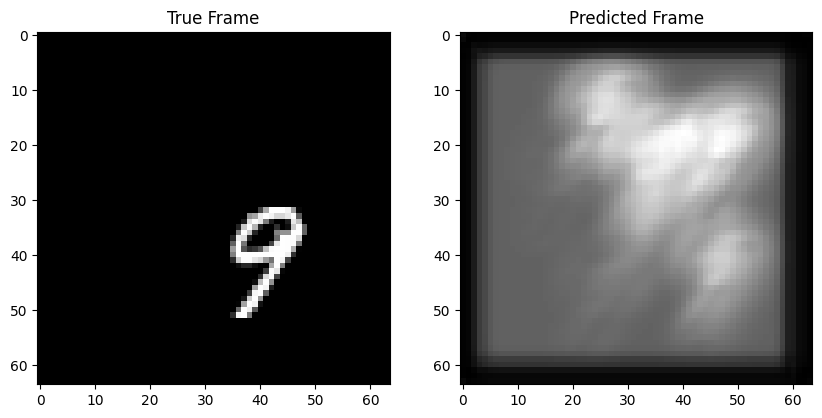

In [72]:
# Predict the next frame for the first test sample
predicted_frame = model.predict(X_test[:1])[0]

# Plot the true and predicted frames
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("True Frame")
plt.imshow(y_test[0].squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Predicted Frame")
plt.imshow(predicted_frame.squeeze(), cmap='gray')

plt.show()